In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

# 1. dataset 준비하기

In [6]:
np.random.seed(3)

# 훈련 셋과 시험 셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_valid = X_train[50000:]
Y_valid = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_valid = X_valid.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0


# 훈련셋, 검증셋 랜덤하게 고르기
train_rand_idxs = np.random.choice(50000, 700)
valid_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_valid = X_valid[valid_rand_idxs]
Y_valid = Y_valid[valid_rand_idxs]

In [8]:
# 라벨링 형태 바꾸기
Y_train = np_utils.to_categorical(Y_train)
Y_valid = np_utils.to_categorical(Y_valid)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기

In [9]:
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기

In [11]:
hist = model.fit(X_train, Y_train, epochs=500, batch_size=10, validation_data=(X_valid, Y_valid))

Epoch 1/500
70/70 [==============================] - 1s 4ms/step - loss: 2.2888 - accuracy: 0.1914 - val_loss: 2.2775 - val_accuracy: 0.1667
Epoch 2/500
70/70 [==============================] - 0s 2ms/step - loss: 2.2442 - accuracy: 0.2171 - val_loss: 2.2446 - val_accuracy: 0.1967
Epoch 3/500
70/70 [==============================] - 0s 2ms/step - loss: 2.2015 - accuracy: 0.2443 - val_loss: 2.2068 - val_accuracy: 0.2300
Epoch 4/500
70/70 [==============================] - 0s 2ms/step - loss: 2.1579 - accuracy: 0.2614 - val_loss: 2.1692 - val_accuracy: 0.2467
Epoch 5/500
70/70 [==============================] - 0s 2ms/step - loss: 2.1152 - accuracy: 0.2814 - val_loss: 2.1337 - val_accuracy: 0.2567
Epoch 6/500
70/70 [==============================] - 0s 2ms/step - loss: 2.0707 - accuracy: 0.2957 - val_loss: 2.1037 - val_accuracy: 0.2367
Epoch 7/500
70/70 [==============================] - 0s 2ms/step - loss: 2.0298 - accuracy: 0.3014 - val_loss: 2.0694 - val_accuracy: 0.2500
Epoch 8/500
7

# 5. 모델 학습 과정 표시하기

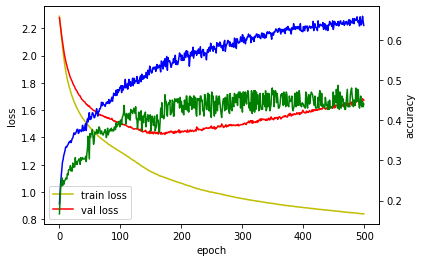

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
loss_ax.legend(loc='lower left')

plt.show()